In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 21 14:55:08 2018

@author: Ayush Yembarwar
"""

'\nCreated on Thu Jun 21 14:55:08 2018\n\n@author: Ayush Yembarwar\n'

In [82]:
import numpy as np
import pandas as pd; pd.set_option('display.max_row', 10)
import osmnx as ox
import networkx as nx
import seaborn as sns
import time
from itertools import compress

In [4]:
dataset_path = "C:/Users/C72178/Downloads/T Drive/release/taxi_log_2008_by_id/"   
dataset_path_csv = 'C:/Users/C72178/Downloads/T Drive/release/CSV_Files/'
dataset_path_nn = "C:/Users/C72178/Downloads/T Drive/release/Nearest_Nodes/"
dataset_path_routes = "C:/Users/C72178/Downloads/T Drive/release/Original_Paths/"

In [5]:
beijing_graph = ox.load_graphml(filename='beijing_graph.graphml', folder = 'C:/Users/C72178/Downloads/T Drive/everything')
print("The graph is already simplified: " ,ox.is_simplified(beijing_graph))

The graph is already simplified:  True


In [6]:
# Save the nearest nodes DataFrames to csv
def save_to_CSV(DataFrame, path):
    for i in range(1, len(DataFrame)):
        DataFrame[i].to_csv( path + str(i) + ".csv", index = False)

In [7]:
len(beijing_graph)  # number of nodes
beijing_graph.nodes[2278069789]
beijing_graph.degree()
histogram = nx.degree_histogram(beijing_graph)

In [8]:
start_time = time.time()
for taxi_num in range(1,10):
    TextFileReader = pd.read_csv(dataset_path + str(taxi_num) + ".txt", chunksize=1,
                                 sep = ",", header = None, encoding='utf-8', parse_dates=[1])
    DataFrame = pd.concat(TextFileReader, ignore_index=True)
    DataFrame.columns = ['Taxi_ID', 'Time', 'Lat', 'Long']
    balltree = ox.get_nearest_nodes(beijing_graph, DataFrame["Lat"][:], DataFrame["Long"][:], method='balltree'); DataFrame['balltree'] = balltree
    
print("Time needed for calculating the distance using the balltree method" ,time.time() - start_time)


Time needed for calculating the distance using the balltree method 10.640063762664795


In [6]:
start_time = time.time()
for taxi_num in range(1,10):
    TextFileReader = pd.read_csv(dataset_path + str(taxi_num) + ".txt", chunksize=1,
                                 sep = ",", header = None, encoding='utf-8', parse_dates=[1])
    DataFrame = pd.concat(TextFileReader, ignore_index=True)
    DataFrame.columns = ['Taxi_ID', 'Time', 'Lat', 'Long']
    kdtree = ox.get_nearest_nodes(beijing_graph, DataFrame["Lat"][:], DataFrame["Long"][:], method='kdtree'); DataFrame['kdtree'] = kdtree

print("Time needed for calculating the distance using the KDtree method" ,time.time() - start_time)

Time needed for calculating the distance using the KDtree method 7.0053911209106445


In [ ]:
start_time = time.time()
for taxi_num in range(1,10):
    TextFileReader = pd.read_csv(dataset_path + str(taxi_num) + ".txt", chunksize=1,
                                 sep = ",", header = None, encoding='utf-8', parse_dates=[1])
    DataFrame = pd.concat(TextFileReader, ignore_index=True)
    DataFrame.columns = ['Taxi_ID', 'Time', 'Lat', 'Long']
    haversine = ox.get_nearest_nodes(beijing_graph, DataFrame["Lat"][:], DataFrame["Long"][:], method=None); DataFrame['haversine'] = haversine
    
print("Time needed for calculating the distance using the haversine method" ,time.time() - start_time)

In [8]:
kdtree_time = 0; balltree_time = 0; haversine_time = 0 

DataFrame = [[]]
for taxi_num in range(1,5):
    TextFileReader = pd.read_csv(dataset_path + str(taxi_num) + ".txt", chunksize=1,
                                 sep = ",", header = None, encoding='utf-8', parse_dates=[1])
    DataFrame.append(pd.concat(TextFileReader, ignore_index=True))
    DataFrame[taxi_num].columns = ['Taxi_ID', 'Time', 'Long', 'Lat']
    
    start_time = time.time()
    balltree = ox.get_nearest_nodes(beijing_graph, DataFrame[taxi_num]["Lat"][:], DataFrame[taxi_num]["Long"][:], method='balltree')
    balltree_time += time.time() - start_time
    DataFrame[taxi_num]['balltree'] = balltree
    
    start_time = time.time()
    kdtree = ox.get_nearest_nodes(beijing_graph, DataFrame[taxi_num]["Lat"][:], DataFrame[taxi_num]["Long"][:], method='kdtree') 
    kdtree_time += time.time() - start_time
    DataFrame[taxi_num]['kdtree'] = kdtree
    
    start_time = time.time()
    haversine = ox.get_nearest_nodes(beijing_graph, DataFrame[taxi_num]["Lat"][:], DataFrame[taxi_num]["Long"][:], method=None)
    haversine_time += time.time() - start_time
    DataFrame[taxi_num]['haversine'] = haversine
    
    print("hello")

hello
hello
hello
hello


In [9]:
print("Time needed for the balltree method: ", end =""); print(balltree_time)
print("Time needed for the kdtree method: ", end =""); print(kdtree_time)
print("Time needed for the haversine method: ", end =""); print(haversine_time)

Time needed for the balltree method: 2.732999801635742
Time needed for the kdtree method: 0.551999568939209
Time needed for the haversine method: 478.98677253723145


In [10]:
for i in range(1, len(DataFrame)):
    DataFrame[i].to_csv( dataset_path_nn + str(i) + "_all_methods" + ".csv", index = False)

In [11]:
DataFrame

# We can see that the first element of DataFrame is just an empty list, we have set it so, so that the i-th object
# in DataFrame has data abouth the Taxi Number i and Taxi Number 0 doesn't exist.

[[],
      Taxi_ID                Time        Lat      Long    balltree      kdtree  \
 0          1 2008-02-02 15:36:08  116.51172  39.92123    64384543    64384543   
 1          1 2008-02-02 15:46:08  116.51135  39.93883    35554805    35554805   
 2          1 2008-02-02 15:46:08  116.51135  39.93883    35554805    35554805   
 3          1 2008-02-02 15:56:08  116.51627  39.91034  2995462840  2995462840   
 4          1 2008-02-02 16:06:08  116.47186  39.91248  2207734235  2207734235   
 ..       ...                 ...        ...       ...         ...         ...   
 583        1 2008-02-08 15:11:31  116.48347  39.91954  1802398392  1802398392   
 584        1 2008-02-08 15:21:31  116.50789  39.93128  2958762914  2958762914   
 585        1 2008-02-08 15:31:31  116.53174  39.91536  1408034693  1408034693   
 586        1 2008-02-08 15:41:31  116.57156  39.90263  1977867485  1977867485   
 587        1 2008-02-08 15:51:31  116.54723  39.90841   606843187  5449503876   
 
       ha

In [12]:
# Check_accuracy of DataFrame against Haversine

number_of_entries = 0; fault_kdtree = 0; fault_balltree = 0

for i in range(len(DataFrame)):
    number_of_entries += len(DataFrame[i])
    for j in range(len(DataFrame[i])):
        a = DataFrame[i]["haversine"][j]
        if a != DataFrame[i]["kdtree"][j]:
            fault_kdtree += 1
        if a != DataFrame[i]["balltree"][j]:
            fault_balltree += 1
    
print("The percentage error of kdtree method is: ", 100 * (fault_kdtree / number_of_entries ))
print("The percentage error of balltree method is: ", 100 * (fault_balltree / number_of_entries ))

The percentage error of kdtree method is:  4.78513356562137
The percentage error of balltree method is:  0.0


We can see that balltree is the best method to use as it is very accurate, even when compared to the KDtree method with k set to be 100 and even ouperforms KDtree on time.

There are zero errors. As our GPS data is of a cab sampled every <> minutes, the max distance between entries can't be too large, thus Balltree ensures 100% accuracy on our data even when the distances are very small.

We decide to use BallTree method for everything that follows.

In [40]:
# We use balltree method for calculating nearest node of the first 200 taxis and save DataFrame to CSV

balltree_time = 0
DataFrame = [[]]
for taxi_num in range(1,200):
    TextFileReader = pd.read_csv(dataset_path + str(taxi_num) + ".txt", chunksize=1,
                                 sep = ",", header = None, encoding='utf-8', parse_dates=[1])
    DataFrame.append(pd.concat(TextFileReader, ignore_index=True))
    DataFrame[taxi_num].columns = ['Taxi_ID', 'Time', 'Long', 'Lat']
    
    start_time = time.time()
    balltree = ox.get_nearest_nodes(beijing_graph, DataFrame[taxi_num]["Long"][:], DataFrame[taxi_num]["Lat"][:], method='balltree')
    balltree_time += time.time() - start_time
    DataFrame[taxi_num]['balltree'] = balltree
print("Time needed for finding the nearest nodes using the balltree method: ", balltree_time)


# Find the distances between the calculated nearest nodes and the GPS points

distance_time = time.time()
for taxi_num in range(1,200):
    lng_node = []; lat_node = []
    for x in DataFrame[taxi_num]['balltree']:
        a = beijing_graph.nodes[x]
        lng_node.append(a['x']); lat_node.append(a['y'])
    
    DataFrame[taxi_num]['distance'] = ox.great_circle_vec(lat1 = DataFrame[taxi_num]["Lat"][:], lng1 = DataFrame[taxi_num]["Long"][:], lat2 = lat_node, lng2 = lng_node, earth_radius=6371009)
print("Time needed for calculating the distances: ", time.time() - distance_time)
    

# Save DataFrame to CSV Files

save_time = time.time()
save_to_CSV(DataFrame, dataset_path_routes)
print("Time needed for saving to CSV files: ", time.time() - save_time)

Time needed for finding the nearest nodes using the balltree method:  134.15041399002075
Time needed for calculating the distances:  1.4481446743011475
Time needed for saving to CSV files:  3.387338638305664


In [20]:
# Reading the nearest nodes CSV files into the jupyter notebook so that we can process it

start_read = time.time()
DataFrame = [[]]
for taxi_num in range(1,20):
    TextFileReader = pd.read_csv(dataset_path_routes + str(taxi_num) + ".csv", chunksize=1,
                                 header = 0, encoding='utf-8', parse_dates=[1])
    DataFrame.append(pd.concat(TextFileReader, ignore_index=True))
    DataFrame[taxi_num].columns = ['Taxi_ID', 'Time', 'Long', 'Lat', 'balltree', 'distance']
    
print("Time required for reading the CSV files is: ", time.time() - start_read)

Time required for reading the CSV files is:  37.33800029754639


In [21]:
DataFrame[1]   # The distances are in metres

,Taxi_ID,Time,Long,Lat,balltree,distance
0,1,2008-02-02 15:36:08,116.51172,39.92123,64384543,72.897161
1,1,2008-02-02 15:46:08,116.51135,39.93883,35554805,30.130037
2,1,2008-02-02 15:46:08,116.51135,39.93883,35554805,30.130037
3,1,2008-02-02 15:56:08,116.51627,39.91034,2995462840,7.516360
4,1,2008-02-02 16:06:08,116.47186,39.91248,2207734235,11.443222
...,...,...,...,...,...,...
583,1,2008-02-08 15:11:31,116.48347,39.91954,1802398392,15.395109
584,1,2008-02-08 15:21:31,116.50789,39.93128,2958762914,137.436408
585,1,2008-02-08 15:31:31,116.53174,39.91536,1408034693,283.191279
586,1,2008-02-08 15:41:31,116.57156,39.90263,1977867485,49.066110


In [22]:
# We try to find a suitable BBOX for our data

# Initialize with extremes
north = -90; south = 90; west = 179; east = -179;    

for taxi_num in range(1, len(DataFrame)):
    if north < np.amax(DataFrame[taxi_num]['Lat']) and  np.amax(DataFrame[taxi_num]['Lat']) != 0:   # We check for zeros because
        north = np.amax(DataFrame[taxi_num]['Lat'])                                                 # some taxis in the data set
    if south > np.amin(DataFrame[taxi_num]['Lat']) and  np.amin(DataFrame[taxi_num]['Lat']) != 0:   # have their GPS data as 0.0 
        south = np.amin(DataFrame[taxi_num]['Lat'])                                                 # (I think the NANs got 
    if west > np.amin(DataFrame[taxi_num]['Long']) and np.amin(DataFrame[taxi_num]['Long']) != 0:   # converted to zeros)
        west = np.amin(DataFrame[taxi_num]['Long'])
    if east < np.amax(DataFrame[taxi_num]['Long']) and np.amax(DataFrame[taxi_num]['Long']) != 0:
        east = np.amax(DataFrame[taxi_num]['Long'])
        
print("Found the bounding box: ", end='')
print("North: {}".format(north), end = ' ');print("South: {}".format(south))
print("                        ", end='')
print("West: {}".format(west), end = ' ');print("East: {}".format(east))
        
    

Found the bounding box: North: 42.66187 South: 24.31448
                        West: 101.63284 East: 118.0883


In [29]:
# We try to shorten the graph by removing nodes outside the BBOX
# Set truncate_by_edge = True
'''if True retain node if it's outside bbox but at least one of node's
   neighbors are within bbox '''


beijing_BBOX = ox.truncate_graph_bbox(beijing_graph,north = north,south = south,east = east,west = west,truncate_by_edge = True)
ox.save_graphml(beijing_BBOX, filename='beijing_BBOX.graphml', folder = 'C:/Users/C72178/Downloads/T Drive/everything/')

In [32]:
# This method of iteration is faster

start = time.time()
sum = 0
nodes = np.arange(10000)
for node_id in nodes:
    sum = sum + node_id
print()
print(time.time() - start)


0.0029997825622558594


In [33]:
# This method of iteration is slower

start = time.time()
sum = 0
nodes = np.arange(10000)
for id in range(len(nodes)):
    sum = sum + nodes[id]
print()
print(time.time() - start)


0.007999897003173828


In [46]:
# Convert the graph format to GDF format for easier handling

beijing_graph_gdf = ox.graph_to_gdfs(beijing_graph, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
beijing_BBOX_gdf = ox.graph_to_gdfs(beijing_BBOX, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)

In [120]:
# Nodes
beijing_graph_gdf[0]

,highway,osmid,ref,x,y,geometry
25248785,traffic_signals,25248785,NaN,116.389,39.9062,POINT (116.3894568 39.9061898)
25248786,traffic_signals,25248786,NaN,116.393,39.9063,POINT (116.3932017 39.9063158)
25248787,traffic_signals,25248787,NaN,116.397,39.9065,POINT (116.3970962 39.9065222)
25248790,traffic_signals,25248790,NaN,116.39,39.8988,POINT (116.3898158 39.8987502)
25248791,traffic_signals,25248791,NaN,116.393,39.8988,POINT (116.3934985 39.8988448)
...,...,...,...,...,...,...
5715300435,NaN,5715300435,NaN,116.203,39.9156,POINT (116.2025631 39.9155803)
5715300440,NaN,5715300440,NaN,116.203,39.9211,POINT (116.2027497 39.9211401)
5715300441,NaN,5715300441,NaN,116.201,39.9211,POINT (116.2008567 39.9211489)
5715300442,NaN,5715300442,NaN,116.204,39.9211,POINT (116.2035824 39.9211362)


In [48]:
# Edges
beijing_graph_gdf[1]

,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,"LINESTRING (116.6408857 40.7131417, 116.640768...",trunk,NaN,0,2,681.826,NaN,京加路,True,226219768,G111,NaN,NaN,2453143553,2453143560,NaN
1,NaN,yes,"LINESTRING (116.6408857 40.7131417, 116.640857...",unclassified,NaN,0,NaN,180.369,NaN,NaN,False,"[237411240, 237411237, 237411239]",NaN,NaN,NaN,2453143553,2453143533,NaN
2,NaN,NaN,"LINESTRING (116.7288941 39.9262296, 116.728915...",tertiary,NaN,0,NaN,58.217,NaN,NaN,False,31814778,NaN,NaN,NaN,1406795780,2639502234,NaN
3,NaN,NaN,"LINESTRING (116.7288941 39.9262296, 116.728851...",primary,NaN,0,NaN,75.177,NaN,NaN,False,396761495,NaN,NaN,NaN,1406795780,1406795788,NaN
4,NaN,NaN,"LINESTRING (116.7288941 39.9262296, 116.731550...",motorway_link,NaN,0,NaN,543.943,NaN,NaN,True,127031067,NaN,NaN,NaN,1406795780,1406795796,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126568,NaN,NaN,"LINESTRING (116.3305569 40.2194338, 116.333176...",secondary,NaN,0,NaN,223.789,NaN,昌崔路,False,495215040,X033,NaN,NaN,5308415993,2190817673,NaN
126569,NaN,NaN,"LINESTRING (116.3305569 40.2194338, 116.333176...",secondary,NaN,1,NaN,223.789,NaN,昌崔路,False,499204716,X033,NaN,NaN,5308415993,2190817673,NaN
126570,NaN,NaN,"LINESTRING (116.3305569 40.2194338, 116.330114...",tertiary,NaN,0,NaN,900.495,NaN,NaN,False,"[549555187, 549555189]",NaN,NaN,NaN,5308415993,5308415973,NaN
126571,NaN,NaN,"LINESTRING (116.7041256 39.9254528, 116.704745...",motorway_link,NaN,0,NaN,77.586,NaN,NaN,True,127031062,NaN,NaN,NaN,1406795772,605261580,NaN


### We now try to plot a path for these taxis

In [ ]:
# Fastest way apparently to find which indices have a True value stored in an array
# We use the compress and range method in the definition of function find_route()

self.states = [False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False]

>>> from itertools import compress
>>> list(compress(xrange(len(t)), t))
[4, 5, 7]
>>> t = t*1000
>>> %timeit [i for i, x in enumerate(t) if x]
100 loops, best of 3: 2.55 ms per loop
>>> %timeit list(compress(range(len(t)), t))
1000 loops, best of 3: 696 µs per loop

In [149]:
# We use an approximate, crude method first to find the paths taken 
'''
We find if there is a direct road between 2 consecutive closest nodes, if not we assume the taxi takes the shortest route possible
'''

def find_route(graph_gdf = beijing_graph_gdf, graph = beijing_graph, DataFrame = DataFrame, ):
    edges = [[]]
    error_log = []
    for taxi_num in range(1, len(DataFrame)):
        nodes = DataFrame[taxi_num]['balltree']
        flag = False
        temp_route = []
        for node_id in nodes:
            if flag == False:                # For the first node in the list
                flag = True
                last_node_id = node_id
                temp_route.append(['First node'])
            
            else:
                
                if last_node_id == node_id:   
                    temp_route.append(['At the same node'])
                    
                else: 

                    bool_array1 = np.multiply(graph_gdf[1].loc[:, 'u'] == last_node_id, graph_gdf[1].loc[:, 'v'] == node_id)
                    compressed1 = list(compress(range(len(bool_array1)), bool_array1))
                    
                    if compressed1 == []:
                        bool_array2 = np.multiply(graph_gdf[1].loc[:, 'u'] == node_id, graph_gdf[1].loc[:, 'v'] == last_node_id)
                        compressed2 = list(compress(range(len(bool_array2)), bool_array2))
                        
                        if compressed2 == []:
                            try:
                                temp_route.append(nx.shortest_path(graph, source = last_node_id, target = node_id))
                            except nx.NetworkXNoPath:
                                temp_route.append(["NetworkXNoPath Error"])
                                error_log.append(["NetworkXNoPath Error in taxi_num " + str(taxi_num) + " at node_ID: " + str(node_id)])
                        
                        else:
                            temp_route.append(compressed2)
                                                    
                    else:
                        temp_route.append(compressed1)
                                         
            last_node_id = node_id
        DataFrame[taxi_num]['Route'] = temp_route
    return DataFrame, error_log


In [150]:
DF2, error_log = find_route()

In [151]:
DF2

[[],
      Taxi_ID                Time       Long       Lat    balltree    distance  \
 0          1 2008-02-02 15:36:08  116.51172  39.92123    64384543   72.897161   
 1          1 2008-02-02 15:46:08  116.51135  39.93883    35554805   30.130037   
 2          1 2008-02-02 15:46:08  116.51135  39.93883    35554805   30.130037   
 3          1 2008-02-02 15:56:08  116.51627  39.91034  2995462840    7.516360   
 4          1 2008-02-02 16:06:08  116.47186  39.91248  2207734235   11.443222   
 ..       ...                 ...        ...       ...         ...         ...   
 583        1 2008-02-08 15:11:31  116.48347  39.91954  1802398392   15.395109   
 584        1 2008-02-08 15:21:31  116.50789  39.93128  2958762914  137.436408   
 585        1 2008-02-08 15:31:31  116.53174  39.91536  1408034693  283.191279   
 586        1 2008-02-08 15:41:31  116.57156  39.90263  1977867485   49.066110   
 587        1 2008-02-08 15:51:31  116.54723  39.90841   606843187  143.141443   
 
         

In [152]:
error_log

[['NetworkXNoPath Error in taxi_num 2 at node_ID: 4807300382'],
 ['NetworkXNoPath Error in taxi_num 3 at node_ID: 734045313'],
 ['NetworkXNoPath Error in taxi_num 4 at node_ID: 320642873'],
 ['NetworkXNoPath Error in taxi_num 6 at node_ID: 4714905655'],
 ['NetworkXNoPath Error in taxi_num 7 at node_ID: 4714905655'],
 ['NetworkXNoPath Error in taxi_num 9 at node_ID: 3226643977'],
 ['NetworkXNoPath Error in taxi_num 10 at node_ID: 345589969'],
 ['NetworkXNoPath Error in taxi_num 10 at node_ID: 5600218374'],
 ['NetworkXNoPath Error in taxi_num 10 at node_ID: 342965822'],
 ['NetworkXNoPath Error in taxi_num 12 at node_ID: 733859706'],
 ['NetworkXNoPath Error in taxi_num 12 at node_ID: 1851806798'],
 ['NetworkXNoPath Error in taxi_num 12 at node_ID: 1851806798'],
 ['NetworkXNoPath Error in taxi_num 15 at node_ID: 3318033527'],
 ['NetworkXNoPath Error in taxi_num 16 at node_ID: 418117222'],
 ['NetworkXNoPath Error in taxi_num 16 at node_ID: 244891778'],
 ['NetworkXNoPath Error in taxi_num 16

In [155]:
temp = []
flag = 0

for _ in range(len(DF2[2])):
    for __ in range(len(DF2[2]['Route'][_])):
        if type(DF2[2]['Route'][_][__]) == int and DF2[2]['Route'][_][__] != None:
            for ___ in range(len(temp)):
                if DF2[2]['Route'][_][__] == DF2[2]['Route'][_][___]:
                    flag = 1
                    break
            if flag == 0:
                temp.append(DF2[2]['Route'][_][__])
        flag = 0

temp

[734417873,
 385035508,
 322121772,
 528929563,
 384077855,
 734169381,
 598404754,
 734169488,
 598404760,
 598404758,
 734169851,
 598404759,
 1300406531,
 36704825,
 2351356051,
 1363518526,
 322109786,
 1359089789,
 1363518527,
 2738796036,
 2738796216,
 2738796154,
 1230291480,
 1230291444,
 1230291503,
 1230291404,
 1230291454,
 2453761056,
 332473651,
 1230312281,
 1230312383,
 1230312251,
 529537663,
 2453767260,
 2453767259,
 1858572349,
 529536721,
 1858572352,
 1858572351,
 1858572343,
 4724378157,
 1231494419,
 262773794,
 373101841,
 320833081,
 390934195,
 262773861,
 262774308,
 262774376,
 701760169,
 1634509644,
 1634491260,
 1634509658,
 1634509662,
 1634509676,
 317995521,
 1634509683,
 1807477836,
 1807587002,
 1807288226,
 322450445,
 5239225723,
 245109116,
 5239222320]

AttributeError: 'NoneType' object has no attribute 'values'

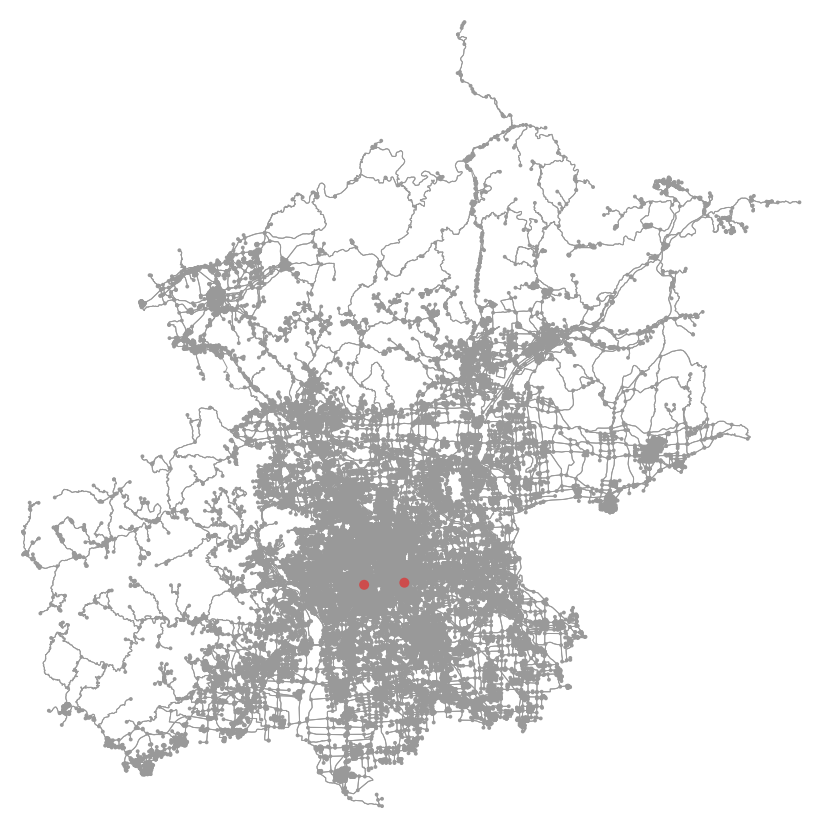

In [156]:
ox.plot_graph_route(beijing_graph , fig_height = 15, route = temp)